<a href="https://colab.research.google.com/github/shivangi0520/LSTM-model/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
import time
import datetime

In [ ]:
!pip install yfinance

In [ ]:
from yfinance.utils import auto_adjust
import yfinance as yf
hist = yf.Ticker('DJI')
df= hist.history(start="2008-08-08", end="2016-07-16", auto_adjust="True")


In [ ]:
df

In [ ]:
df = df.reset_index()
df.head()

In [ ]:
df = df.drop(['Date','Dividends','Stock Splits'], axis = 1)
df.head()

In [ ]:
plt.plot(df.Close)

In [ ]:
df

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

(1998, 5)

In [ ]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

In [ ]:
data_training.head()

In [ ]:
data_testing.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

In [ ]:
data_training_array.shape

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1298, 100, 1)

In [ ]:
# ML Model

In [ ]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True, ))
model.add(Dropout(0.4))

model.add(LSTM(units = 50, activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
41/41 [==============================] - 17s 238ms/step - loss: 0.1154
Epoch 2/50
41/41 [==============================] - 11s 258ms/step - loss: 0.0222
Epoch 3/50
41/41 [==============================] - 10s 254ms/step - loss: 0.0205
Epoch 4/50
41/41 [==============================] - 10s 253ms/step - loss: 0.0182
Epoch 5/50
41/41 [==============================] - 10s 250ms/step - loss: 0.0188
Epoch 6/50
41/41 [==============================] - 10s 238ms/step - loss: 0.0169
Epoch 7/50
41/41 [==============================] - 11s 261ms/step - loss: 0.0154
Epoch 8/50
41/41 [==============================] - 11s 262ms/step - loss: 0.0158
Epoch 9/50
41/41 [==============================] - 10s 255ms/step - loss: 0.0150
Epoch 10/50
41/41 [==============================] - 10s 254ms/step - loss: 0.0136
Epoch 11/50
41/41 [==============================] - 10s 233ms/step - loss: 0.0127
Epoch 12/50
41/41 [==============================] - 11s 258ms/step - loss: 0.0130
Epoch 13/50
4

In [ ]:
data_testing.head()

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_training.tail(100)

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-32-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [ ]:
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

(700, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(600, 100, 1)
(600,)


In [ ]:
# Making Predictions

y_predicted = model.predict(x_test)

19/19 [==============================] - 2s 61ms/step


In [ ]:
y_predicted.shape

(600, 1)

In [ ]:
y_test

array([0.41314413, 0.37204891, 0.43298322, 0.42343797, 0.43993491,
       0.44816967, 0.43907901, 0.42103162, 0.41806363, 0.3562473 ,
       0.34469675, 0.39322487, 0.41702103, 0.38654056, 0.41563064,
       0.40809068, 0.40111236, 0.42549679, 0.39905354, 0.39777021,
       0.41351829, 0.44950654, 0.46953284, 0.4803348 , 0.48022775,
       0.43747477, 0.39287734, 0.39560433, 0.4440254 , 0.37263719,
       0.33429586, 0.3734393 , 0.39734225, 0.4407104 , 0.43635201,
       0.44723387, 0.46466687, 0.46127093, 0.46127093, 0.4237855 ,
       0.44710018, 0.4702817 , 0.48242052, 0.47656495, 0.46426581,
       0.4689981 , 0.43434672, 0.465763  , 0.4744526 , 0.48308895,
       0.51308794, 0.51840876, 0.49129708, 0.44659259, 0.45849067,
       0.46399844, 0.42720782, 0.46966653, 0.47234026, 0.48923852,
       0.50774049, 0.49643042, 0.51394332, 0.51888971, 0.52594845,
       0.52025373, 0.52431759, 0.55068042, 0.57426299, 0.57928928,
       0.58003813, 0.55276613, 0.52343505, 0.53453101, 0.53594

In [ ]:
y_predicted

array([[0.3556941 ],
       [0.36256152],
       [0.36898616],
       [0.37496147],
       [0.380523  ],
       [0.3857391 ],
       [0.3906374 ],
       [0.39518702],
       [0.39931306],
       [0.40293288],
       [0.40580073],
       [0.40769786],
       [0.408694  ],
       [0.40905827],
       [0.40895486],
       [0.40861875],
       [0.40821612],
       [0.40782553],
       [0.40757412],
       [0.40744498],
       [0.4073817 ],
       [0.40739083],
       [0.4076261 ],
       [0.40828484],
       [0.40955204],
       [0.41147575],
       [0.41382116],
       [0.4161104 ],
       [0.4179531 ],
       [0.41932866],
       [0.42004958],
       [0.41990596],
       [0.41890624],
       [0.41731587],
       [0.41555703],
       [0.41399843],
       [0.4128981 ],
       [0.41246107],
       [0.41276342],
       [0.413741  ],
       [0.41512713],
       [0.4167234 ],
       [0.41847524],
       [0.42043796],
       [0.42282695],
       [0.42577294],
       [0.4290457 ],
       [0.432

In [ ]:
scaler.scale_

array([0.00026737])

In [ ]:
scale_factor = 1/0.00026737
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

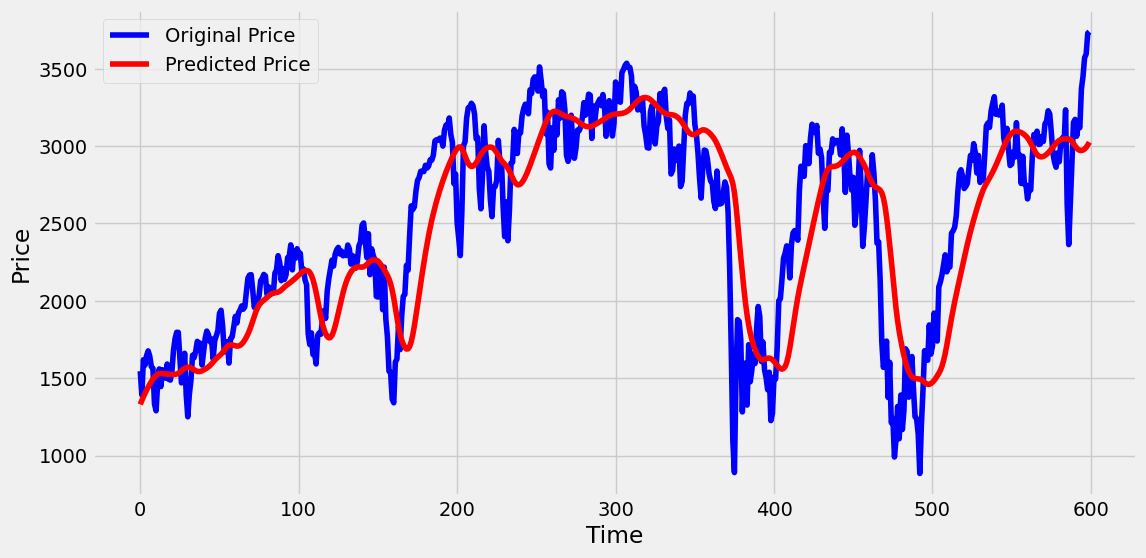

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report